In [1]:
import numpy as np
import pandas as pd

import igraph as ig

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

# Data preparation

Let's load the data. Pick one of the `cordis` datasets; you should have seome folders under `data/raw`. Go check them.

In [2]:
projects = pd.read_csv('../data/raw/cordis-HORIZONprojects-csv/csv/project.csv', delimiter=';')
projects.head()

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,101095387,AISym4MED,SIGNED,Synthetic and scalable data platform for medic...,2022-12-01,2026-11-30,6341765,6341765,HORIZON.2.1,HORIZON-HLTH-2022-IND-13-02,2022-11-22,HORIZON,HORIZON-HLTH-2022-IND-13,HORIZON-HLTH-2022-IND-13,RIA,NaN,AISym4Med aims at developing a platform that w...,2022-12-30 17:42:45,244110,10.3030/101095387
1,101062897,IMPROVE,SIGNED,IMaging PROstate cancer using ViscoElastic bio...,2023-09-01,2025-08-31,0,"181152,96",HORIZON.1.2,HORIZON-MSCA-2021-PF-01-01,2022-06-30,HORIZON,HORIZON-MSCA-2021-PF-01,HORIZON-MSCA-2021-PF-01,MSCA-PF,NaN,IMPROVE aims to demonstrate the potentiality o...,2022-08-26 02:24:17,240147,10.3030/101062897
2,101044731,SAINTBARTH,SIGNED,"Slavery, Abolition and Archipelagic Connection...",2024-01-01,2028-12-31,1992925,1992925,HORIZON.1.1,ERC-2021-COG,2022-07-11,HORIZON,ERC-2021-COG,ERC-2021-COG,HORIZON-AG,NaN,Surveys and datasets of the trans-Atlantic sla...,2022-08-26 14:59:15,240177,10.3030/101044731
3,101065876,TEMP-MOMO,SIGNED,Drivers of spatiotemporal variation in tempera...,2022-09-01,2024-08-31,0,"195914,88",HORIZON.1.2,HORIZON-MSCA-2021-PF-01-01,2022-07-13,HORIZON,HORIZON-MSCA-2021-PF-01,HORIZON-MSCA-2021-PF-01,HORIZON-AG-UN,NaN,Europe emerges as a major climate warming hots...,2022-08-26 15:30:46,240278,10.3030/101065876
4,101057389,CINDERELLA,SIGNED,Clinical Validation of an AI-based approach to...,2022-06-01,2026-05-31,5379050,5378299,HORIZON.2.1,HORIZON-HLTH-2021-DISEASE-04-04,2022-05-23,HORIZON,HORIZON-HLTH-2021-DISEASE-04,HORIZON-HLTH-2021-DISEASE-04,RIA,NaN,Breast cancer is the most commonly diagnosed c...,2022-09-04 13:43:33,241461,10.3030/101057389


In [3]:
organisations = pd.read_csv('../data/raw/cordis-HORIZONprojects-csv/csv/organization.csv', delimiter=';')
organisations.head()

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
0,101095387,AISym4MED,908114874,BE0692797754,ZABALA BRUSSELS,ZABALA BRUSSELS,True,PRC,RUE BELLIARD 20,1040,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,1954294,5,participant,464375.0,464375.0,464375,False,NaN
1,101095387,AISym4MED,900973055,FI29362646,SAIDOT OY,SAIDOT,True,PRC,TEKNIIKANTIE 2,02150,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,1965161,11,participant,548750.0,548750.0,548750,False,NaN
2,101095387,AISym4MED,991228063,BE0890217005,TIME.LEX,time.lex,True,PRC,JOSEPH STEVENSSTRAAT 7,1000,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,2349568,7,participant,417187.5,417187.5,"417187,5",False,NaN
3,101095387,AISym4MED,999993468,GB649926678,IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MED...,Imperial,False,HES,SOUTH KENSINGTON CAMPUS EXHIBITION ROAD,SW7 2AZ,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,1905566,14,associatedPartner,NaN,0.0,NaN,False,NaN
4,101095387,AISym4MED,974142483,ESA50086412,INSTRUMENTACION Y COMPONENTES SA,NaN,False,PRC,CALLE ALAUN 8 PLA ZA,50197,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,2054577,2,participant,1205000.0,1205000.0,1205000,False,NaN


# Data analysis

In [4]:
organisations.columns

Index(['projectID', 'projectAcronym', 'organisationID', 'vatNumber', 'name',
       'shortName', 'SME', 'activityType', 'street', 'postCode', 'city',
       'country', 'nutsCode', 'geolocation', 'organizationURL', 'contactForm',
       'contentUpdateDate', 'rcn', 'order', 'role', 'ecContribution',
       'netEcContribution', 'totalCost', 'endOfParticipation', 'active'],
      dtype='object')

In [5]:
organisations.groupby('organisationID')['projectID'].count().sort_values(ascending=False)

organisationID
999997930    385
999984059    238
999991722    215
999979500    188
999991334    178
            ... 
909600041      1
909604794      1
909606734      1
909617986      1
936473600      1
Name: projectID, Length: 14393, dtype: int64

In [6]:
organisations[['organisationID', 'name', 'projectID', 'projectAcronym']].isna().sum()

organisationID    0
name              0
projectID         0
projectAcronym    0
dtype: int64

In [7]:
organisations[['organisationID', 'name', 'projectID', 'projectAcronym']].describe(include='all')

,organisationID,name,projectID,projectAcronym
count,4.026500e+04,40265,4.026500e+04,40265
unique,NaN,14381,NaN,5591
top,NaN,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,NaN,PARC
freq,NaN,385,NaN,199
mean,9.684783e+08,NaN,1.016786e+08,NaN
std,4.174491e+07,NaN,7.309709e+06,NaN
min,8.840175e+08,NaN,1.010390e+08,NaN
25%,9.332999e+08,NaN,1.010603e+08,NaN
50%,9.984544e+08,NaN,1.010728e+08,NaN
75%,9.998938e+08,NaN,1.010916e+08,NaN


Why are there `NaN` values? (Hint: check the manual of `describe`.)

Task: Which are the top-10 organisations with more projects?

In [8]:
organisations.groupby(['organisationID', 'name']).count().sort_values(by='projectID', ascending=False)[:10]

,,projectID,projectAcronym,vatNumber,shortName,SME,activityType,street,postCode,city,country,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
organisationID,name,,,,,,,,,,,,,,,,,,,,,
999997930,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,385,385,385,385,385,385,385,385,385,385,...,385,385,385,385,385,368,374,368,385,0
999984059,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV,238,238,238,238,238,238,238,238,238,238,...,238,238,238,238,238,234,237,235,238,0
999991722,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS,215,215,215,215,215,215,215,215,215,215,...,215,215,215,215,215,206,214,206,215,0
999979500,CONSIGLIO NAZIONALE DELLE RICERCHE,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,184,188,185,188,0
999991334,KATHOLIEKE UNIVERSITEIT LEUVEN,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,168,177,168,178,0
999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,136,150,137,155,0
999992401,COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,148,152,148,153,0
999977366,TECHNISCHE UNIVERSITEIT DELFT,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,143,147,143,148,0
999991043,KOBENHAVNS UNIVERSITET,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,135,142,135,143,0


Task: Which are the top-10 funded organisations?

In [9]:
organisations.groupby(['organisationID', 'name']).sum('ecContribution').sort_values(by='ecContribution', ascending=False)[:10]

,,projectID,nutsCode,rcn,order,ecContribution,netEcContribution,endOfParticipation,active
organisationID,name,,,,,,,,
999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV,15665502765,0.0,302208460,749,3.706843e+08,3.706832e+08,2,0.0
999997930,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,38910753650,0.0,733645220,1581,2.549289e+08,2.487200e+08,0,0.0
999984059,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV,24056887119,0.0,453607056,1652,1.683396e+08,1.692974e+08,0,0.0
948759523,COST ASSOCIATION,101052416,0.0,2565914,1,1.530000e+08,1.530000e+08,0,0.0
999992401,COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES,15464387065,0.0,291571182,990,1.497266e+08,1.500408e+08,0,0.0
999991334,KATHOLIEKE UNIVERSITEIT LEUVEN,17990526328,0.0,339251980,804,1.132715e+08,1.136865e+08,1,0.0
999991722,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS,21730346242,0.0,409698625,1181,1.072007e+08,1.048907e+08,0,0.0
999977366,TECHNISCHE UNIVERSITEIT DELFT,14959177085,0.0,282069056,836,1.071672e+08,1.084302e+08,0,0.0
990797674,KARLSRUHER INSTITUT FUER TECHNOLOGIE,7883198834,0.0,148749432,471,1.046984e+08,1.049669e+08,0,0.0


Task: can you do both in one shot using the `agg()` function? Check the manual.

In [10]:
organisations.groupby(['organisationID', 'name']).agg({'projectID': 'count', 'ecContribution': 'sum'}).sort_values(by='ecContribution', ascending=False)[:10]

,,projectID,ecContribution
organisationID,name,,
999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV,155,3.706843e+08
999997930,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,385,2.549289e+08
999984059,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV,238,1.683396e+08
948759523,COST ASSOCIATION,1,1.530000e+08
999992401,COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES,153,1.497266e+08
999991334,KATHOLIEKE UNIVERSITEIT LEUVEN,178,1.132715e+08
999991722,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS,215,1.072007e+08
999977366,TECHNISCHE UNIVERSITEIT DELFT,148,1.071672e+08
990797674,KARLSRUHER INSTITUT FUER TECHNOLOGIE,78,1.046984e+08


## Building a network

First, let's locate valuable attributes we can use for contructing the network

In [11]:
organisations[['organisationID', 'name', 'country', 'projectID', 'projectAcronym']].values

array([[908114874, 'ZABALA BRUSSELS', 'BE', 101095387, 'AISym4MED'],
       [900973055, 'SAIDOT OY', 'FI', 101095387, 'AISym4MED'],
       [991228063, 'TIME.LEX', 'BE', 101095387, 'AISym4MED'],
       ...,
       [999990946, 'KUNGLIGA TEKNISKA HOEGSKOLAN', 'SE', 101045453,
        'fitsCAN'],
       [999522921, 'REGION STOCKHOLM', 'SE', 101045453, 'fitsCAN'],
       [969818320,
        'NATIONAL SCIENCE CENTER KHARKOV INSTITUTE OF PHYSICS AND TECHNOLOGY',
        'UA', 101072693, 'UAinEuratom21']], dtype=object)

In [12]:
G = ig.Graph.TupleList(
      edges=organisations[['name', 'projectAcronym']].values,
      directed=False
      )

In [13]:
is_bipartite, types = G.is_bipartite(return_types = True)
is_bipartite

False

Why is it not bipartite? (Hint: check collinding names of projects and organisations)

In [14]:
G = ig.Graph.TupleList(
      edges=organisations[['organisationID', 'projectID']].values,
      directed=False,
      vertex_name_attr='id',
      )

In [15]:
is_bipartite, types = G.is_bipartite(return_types = True)
is_bipartite

True

In [16]:
G.vs[0]

igraph.Vertex(<igraph.Graph object at 0x11e05fa40>, 0, {'id': 908114874})

In [17]:
types[0]

False

In [18]:
G_org_projection = G.bipartite_projection(types=types, which=False)

In [19]:
org_names = pd.DataFrame(G_org_projection.vs['id'], columns=['id'])
org_names = pd.merge(org_names, organisations[['organisationID', 'name']].drop_duplicates(), 
         left_on='id', 
         right_on='organisationID', 
         how='left')
org_names

,id,organisationID,name
0,908114874,908114874,ZABALA BRUSSELS
1,900973055,900973055,SAIDOT OY
2,991228063,991228063,TIME.LEX
3,999993468,999993468,IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MED...
4,974142483,974142483,INSTRUMENTACION Y COMPONENTES SA
...,...,...,...
14388,954543924,954543924,BOLCSESZETTUDOMANYI KUTATOKOZPONT
14389,998763993,998763993,FUNDACION CENTRO DE ESTUDIOS MONETARIOS Y FINA...
14390,998692601,998692601,LEIBNIZ-INSTITUT FUR ASTROPHYSIK POTSDAM (AIP)
14391,997819213,997819213,LEIBNIZ-INSTITUT FUR ANGEWANDTE GEOPHYSIK


In [20]:
G_org_projection.vs['name'] = org_names['name']


In [21]:
list(G_org_projection.vs)

[igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 0, {'id': 908114874, 'name': 'ZABALA BRUSSELS'}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 1, {'id': 900973055, 'name': 'SAIDOT OY'}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 2, {'id': 991228063, 'name': 'TIME.LEX'}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 3, {'id': 999993468, 'name': 'IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MEDICINE'}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 4, {'id': 974142483, 'name': 'INSTRUMENTACION Y COMPONENTES SA'}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 5, {'id': 994498030, 'name': 'IBERMATICA SA'}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 6, {'id': 993205990, 'name': 'Servicio Vasco de Salud Osakidetza'}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 7, {'id': 904226435, 'name': "CONSORCIO SANITARIO DE L'ALT PENEDES Y GARRAF (CSAPG)"}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 8, {'id': 923428652, 'name':

In [22]:
organisations[organisations.organisationID == 999687821]

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
1307,101095759,Hexa-X-II,999687821,FR84450249677,SEQUANS COMMUNICATIONS SA,SEQ,True,PRC,15-55 BOULEVARD CHARLES DE GAULLE LES PORTES D...,92700,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-25 10:03:04,2558746,27,participant,499736.25,499736.25,"555262,5",False,NaN
15141,101096379,CENTRIC,999687821,FR84450249677,SEQUANS COMMUNICATIONS SA,SEQ,True,PRC,15-55 BOULEVARD CHARLES DE GAULLE LES PORTES D...,92700,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-25 10:01:59,2558746,6,participant,364500.00,364500.00,405000,False,NaN
19795,101092598,COREnext,999687821,FR84450249677,SEQUANS COMMUNICATIONS SA,SEQ,True,PRC,15-55 BOULEVARD CHARLES DE GAULLE LES PORTES D...,92700,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-25 10:08:16,2558746,12,participant,202500.00,202500.00,202500,False,NaN


Is the network connected?

In [23]:
G_org_projection.is_connected()

False

Analyse the connected component

In [24]:
components = G_org_projection.connected_components()

In [25]:
len(components)

343

In [26]:
components[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,

In [27]:
len(components[0])

14028

In [28]:
components[1]

[30]

In [29]:
30 in components[0]

False

In [30]:
G_org_projection.vs[30]

igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 30, {'id': 898864178, 'name': 'IDOVEN 1903 SL'})

In [31]:
organisations[organisations.organisationID == 898864178]

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
30,190173745,WILLEM: AI to Reduce Cardiovascular Diseases,898864178,ESB88119862,IDOVEN 1903 SL,NaN,True,PRC,C/PRINCIPE DE VERGARA 128 ESC DR PISO EN,28002,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-10-17 19:32:11,1968745,1,coordinator,2500000.0,2500000.0,3596296,False,NaN


In [32]:
organisations[organisations.projectID == 190173745]

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
30,190173745,WILLEM: AI to Reduce Cardiovascular Diseases,898864178,ESB88119862,IDOVEN 1903 SL,NaN,True,PRC,C/PRINCIPE DE VERGARA 128 ESC DR PISO EN,28002,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-10-17 19:32:11,1968745,1,coordinator,2500000.0,2500000.0,3596296,False,NaN


Check this out https://cordis.europa.eu/project/id/190173745

Let's check the giant component

In [33]:
H = G_org_projection.connected_components().giant()

In [34]:
H.summary()

'IGRAPH UNW- 14028 347103 -- \n+ attr: id (v), name (v), weight (e)'

What is the percentage of nodes involved in the giant component?

In [35]:
H.vcount() / G_org_projection.vcount() * 100

97.46404502188564

In [36]:
path_lengths = G_org_projection.path_length_hist()
print(path_lengths)

N = 98385417, mean +- sd: 2.7387 +- 0.4996
Each * represents 1157180 items
[1, 2):  (347142)
[2, 3): *********************** (27407538)
[3, 4): *********************************************************** (68273645)
[4, 5): ** (2317770)
[5, 6):  (38706)
[6, 7):  (616)


Let's focus on a single node

In [37]:
G_org_projection.neighborhood(1)

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [38]:
H = G_org_projection.induced_subgraph(G_org_projection.neighborhood(1))
H.summary()

'IGRAPH UNW- 15 105 -- \n+ attr: id (v), name (v), weight (e)'

<AxesSubplot:>

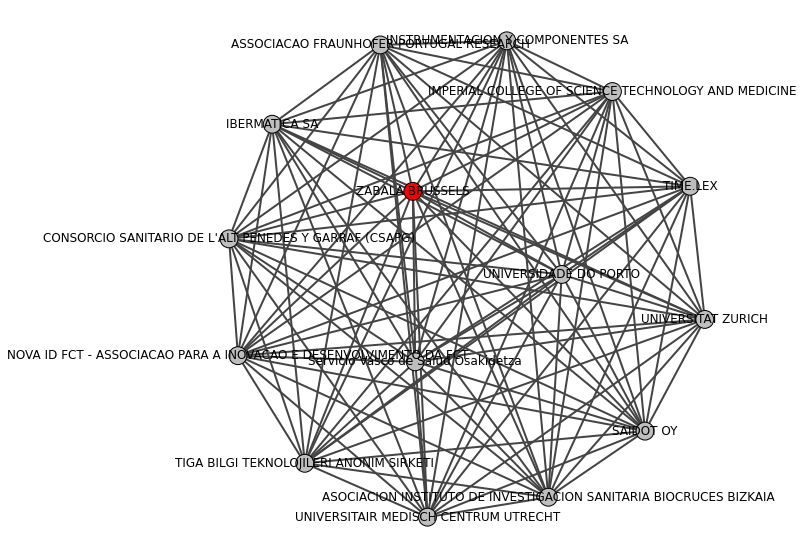

In [39]:
H.vs['color'] = 'grey'
H.vs[0]['color'] = 'red'
fig, ax = plt.subplots()
ig.plot(H, target=ax, vertex_label=H.vs['name'])

In [40]:
G_org_projection.transitivity_local_undirected(1)

1.0

Let's compute the same for the whole network

In [41]:
G_org_projection.transitivity_avglocal_undirected()

0.8333902284719598

In [42]:
G_org_projection.degree(1)

14

In [43]:
G_org_projection.vs['degree'] = G_org_projection.degree()

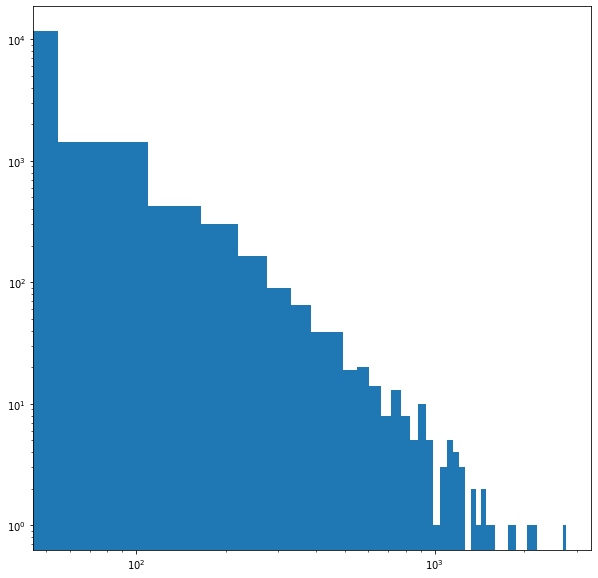

In [44]:
plt.hist(G_org_projection.vs['degree'], 50)
plt.yscale('log')
plt.xscale('log')

In [45]:
highest_degree = sorted(G_org_projection.vs, key=lambda v: v['degree'], reverse=True)

In [46]:
highest_degree[:5]

[igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 76, {'id': 999984059, 'name': 'FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV', 'degree': 2750}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 102, {'id': 999997930, 'name': 'CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS', 'degree': 2192}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 223, {'id': 999979500, 'name': 'CONSIGLIO NAZIONALE DELLE RICERCHE', 'degree': 2105}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 118, {'id': 999991722, 'name': 'AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS', 'degree': 2063}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 106, {'id': 999992401, 'name': 'COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES', 'degree': 1820})]

In [47]:
organisations[organisations.organisationID == 999984059].head()

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
76,101057091,ODELIA,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-25 10:03:29,1905912,8,participant,1289157.50,1289157.50,"1289157,5",False,NaN
505,101086317,EULIAA,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-17 18:04:15,1905912,1,coordinator,1035000.00,1035000.00,1035000,False,NaN
516,101075527,WEDUSEA,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-09-15 14:27:48,1905912,4,participant,1011152.50,1011152.50,"1011152,5",False,NaN
667,101081983,TRANTOR,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-10 22:01:51,1905912,2,participant,440431.00,440431.00,"440431,25",False,NaN
686,101096239,RETICLES,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-16 14:23:17,1905912,2,participant,1408146.25,1408146.25,"1408146,25",False,NaN


In [48]:
G_org_projection.vs['betweenness'] = G_org_projection.betweenness()

In [49]:
list(G_org_projection.vs)

[igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 0, {'id': 908114874, 'name': 'ZABALA BRUSSELS', 'degree': 92, 'betweenness': 25225.31237032828}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 1, {'id': 900973055, 'name': 'SAIDOT OY', 'degree': 14, 'betweenness': 0.0}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 2, {'id': 991228063, 'name': 'TIME.LEX', 'degree': 213, 'betweenness': 73285.24281433146}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 3, {'id': 999993468, 'name': 'IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MEDICINE', 'degree': 812, 'betweenness': 706251.8898758915}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 4, {'id': 974142483, 'name': 'INSTRUMENTACION Y COMPONENTES SA', 'degree': 40, 'betweenness': 1233.956022155993}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 5, {'id': 994498030, 'name': 'IBERMATICA SA', 'degree': 26, 'betweenness': 1471.6388930504427}),
 igraph.Vertex(<igraph.Graph object at 0x11e05f840>, 6, {'id': 9932

Task: now build the network using country codes

Hint: beware of empty country codes!

In [72]:
G = ig.Graph.TupleList(
      edges=organisations[organisations.country.notna()][['country', 'projectID']].values,
      directed=False,
      vertex_name_attr='id'
      )

In [73]:
is_bipartite, types = G.is_bipartite(return_types = True)
is_bipartite

True

In [74]:
G.vs[0]

igraph.Vertex(<igraph.Graph object at 0x11f947d40>, 0, {'id': 'BE'})

In [75]:
types[0]

False

In [76]:
G_country_projected = G.bipartite_projection(types=types, which=False)

In [77]:
list(G_country_projected.vs)

[igraph.Vertex(<igraph.Graph object at 0x11f947940>, 0, {'id': 'BE'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 1, {'id': 'FI'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 2, {'id': 'UK'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 3, {'id': 'ES'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 4, {'id': 'TR'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 5, {'id': 'NL'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 6, {'id': 'CH'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 7, {'id': 'PT'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 8, {'id': 'SE'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 9, {'id': 'FR'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 10, {'id': 'DE'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 11, {'id': 'IT'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 12, {'id': 'PL'}),
 igraph.Vertex(<igraph.Graph object at 0x11f947940>, 13, {'id': 'IL'}),
 i

<AxesSubplot:>

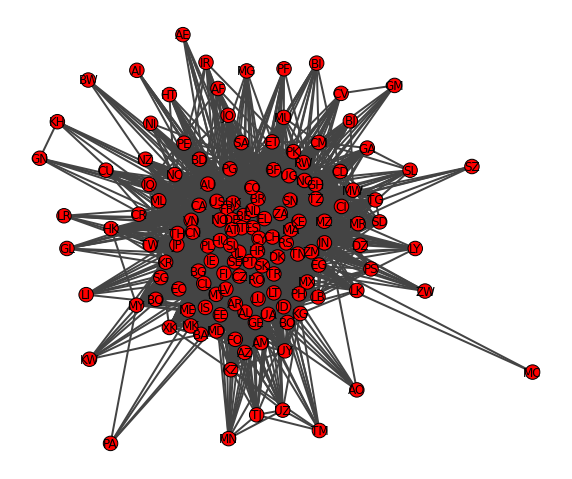

In [78]:
fig, ax = plt.subplots()
ig.plot(G_country_projected, target=ax, vertex_label=G_country_projected.vs['id'])

# Preparing data for VOSviewer

In [79]:
nodes_df = pd.DataFrame.from_dict({attr: G_org_projection.vs[attr] for attr in G_org_projection.vs.attributes()})
nodes_df['label'] = nodes_df['name']
# nodes_df['cluster'] += 1
nodes_df['weight<Occurence>'] = nodes_df['degree']
nodes_df = nodes_df.sort_values('id')
nodes_df[['id', 'label', 'weight<Occurence>']].to_csv('../data/processed/map_vosviewer_projects.txt', sep='\t', index=False)


edge_df = pd.DataFrame([(G_org_projection.vs[e.source]['id'], G_org_projection.vs[e.target]['id'], e['weight']) for e in G_org_projection.es],
                       columns=['source', 'target', 'weight'])
edge_df = edge_df.sort_values(['source', 'target'])
edge_df.to_csv('../data/processed/network_vosviewer_projects.txt', sep='\t', index=False, header=False)

In [80]:
nodes_df = pd.DataFrame.from_dict({attr: G_country_projected.vs[attr] for attr in G_country_projected.vs.attributes()})
nodes_df['label'] = nodes_df['id']
# # nodes_df['cluster'] += 1
# nodes_df['weight<Occurence>'] = nodes_df['degree']
nodes_df = nodes_df.sort_values('id')
nodes_df[['id', 'label']].to_csv('../data/processed/map_vosviewer_countries.txt', sep='\t', index=False)


edge_df = pd.DataFrame([(G_country_projected.vs[e.source]['id'], G_country_projected.vs[e.target]['id']) for e in G_country_projected.es],
                       columns=['source', 'target'])
# edge_df
edge_df = edge_df.sort_values(['source', 'target'])
edge_df.to_csv('../data/processed/network_vosviewer_countries.txt', sep='\t', index=False, header=False)